In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [84]:
class Egoista():
    def __init__(self):
        self.mascara = "Egoista"

    def actuar(self, otra_persona):
        return "correr"

class Impostor():
    def __init__(self):
        self.mascara = "Solidario"
        self.empatia = 0.4

    def actuar(self, otra_persona):
        coin = random.random()
        if coin < self.empatia:
            return "avisar"
        else:
            return "correr"

class Altruista():
    def __init__(self):
        self.mascara = "Altruista"

    def actuar(self, otra_persona):
        return "avisar"

class Solidario():
    def __init__(self):
        self.mascara = "Solidario"

    def actuar(self, otra_persona):
        if otra_persona.mascara == "Solidario":
            return "avisar"
        else:
            return "correr"

In [85]:
#interaccion entre 2 personas
def interaccion(poblacion):
    #Escoge 2 personas para interactuar
    observador, distraido = random.choices(poblacion, k = 2)
    #Uno de los 2 detecta un depredador y actua
    accion = observador.actuar(distraido)
    if accion == "avisar":
        if random.random() < 0.5: #Muere el altruista
             poblacion.remove(observador)
        else: # Ambos se salvan
            pass
    else:
        poblacion.remove(distraido)

def reproduccion(poblacion):
    # Escoge 2 personas para interactuar
    macho, hembra = random.choices(poblacion, k=2)
    #Numero de bebes 
    camada = random.randint(1,4)
    # Verificar si las instancias de macho y hembra son iguales
    crianza = type(macho) == type(hembra)

    for _ in range(camada):
        if crianza:
            poblacion.append(type(macho)())  # El bebé hereda la instancia de los padres
        else:
            # El bebé hereda una instancia al azar
            cria = random.choice([type(macho)(), type(hembra)()])
            poblacion.append(cria)

#Inicializacion de la poblacion
def poblar(Npersonas, alelos = [Solidario(),Altruista(),Egoista(),Impostor()]):
    poblacion = []
    n_alelos=len(alelos)

    for _ in range(n_alelos):
        for i in range(int(Npersonas/n_alelos)):
            poblacion.append(alelos[_])

    return poblacion



In [100]:
#Simulacion
def simulacion(poblacion, dias=1000, mes=5):
    time =np.arange(0,dias,mes)
    
    #Estadistica de personas
    egoistas = np.zeros(time.size)
    altruistas = np.zeros(time.size)
    solidarios = np.zeros(time.size)
    impostores = np.zeros(time.size)

    total_personas = len(poblacion)
    for i, persona in enumerate(poblacion):
        if isinstance(persona, Egoista):
            egoistas[0] += 1
        elif isinstance(persona, Altruista):
            altruistas[0] += 1
        elif isinstance(persona, Solidario):
            solidarios[0] += 1
        elif isinstance(persona, Impostor):
            impostores[0] += 1

    egoistas[0] /= total_personas
    altruistas[0] /= total_personas
    solidarios[0] /= total_personas
    impostores[0] /= total_personas

    for _ in range(dias):
        interaccion(poblacion)
        reproduccion(poblacion)
        
        if _ % mes == 0:
            total_personas = len(poblacion)
            j=int(_ / mes)
            for i, persona in enumerate(poblacion):
                if isinstance(persona, Egoista):
                    egoistas[j] += 1
                elif isinstance(persona, Altruista):
                    altruistas[j] += 1
                elif isinstance(persona, Solidario):
                    solidarios[j] += 1
                elif isinstance(persona, Impostor):
                    impostores[j] += 1

            egoistas[j] /= total_personas
            altruistas[j] /= total_personas
            solidarios[j] /= total_personas
            impostores[j] /= total_personas

    return time, egoistas, altruistas, solidarios, impostores

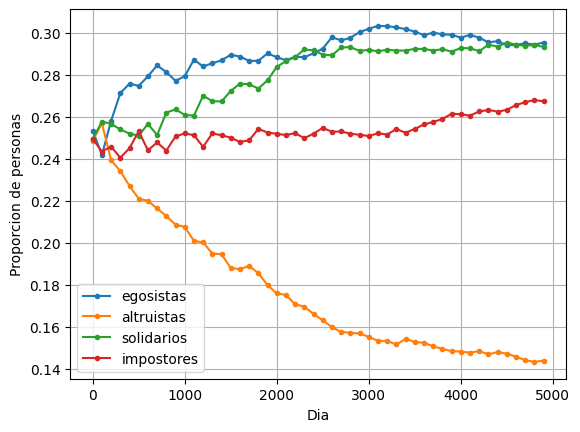

In [101]:
total_personas=1000
poblacion = poblar(total_personas)
time, egoistas, altruistas, solidarios, impostores = simulacion(poblacion,dias=5000, mes=100)
fig, ax = plt.subplots()
ax.plot(time, egoistas, label='egosistas', marker='.')
ax.plot(time, altruistas, label='altruistas', marker='.')
ax.plot(time, solidarios, label='solidarios', marker='.')
ax.plot(time, impostores, label='impostores', marker='.')

ax.set_xlabel("Dia")
ax.set_ylabel("Proporcion de personas")

ax.grid(True)
ax.legend()

plt.show()

In [102]:
n_simulations=100
ego_f=np.zeros(n_simulations)
altru_f=np.zeros(n_simulations)
soli_f=np.zeros(n_simulations)
impo_f=np.zeros(n_simulations)

for _ in range(n_simulations):
    total_personas=1000
    poblacion = poblar(total_personas)
    time, egoistas, altruistas, solidarios, impostores = simulacion(poblacion,dias=5000, mes=4999)
    ego_f[_]=egoistas[-1]
    altru_f[_]=altruistas[-1]
    soli_f[_]=solidarios[-1]
    impo_f[_]=impostores[-1]


Egoistas promedio: 0.28
altruistas promedio: 0.15
solidarios promedio: 0.27
impostores promedio: 0.30


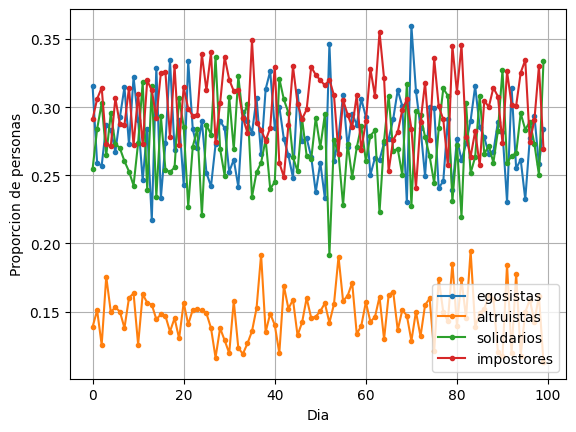

In [103]:
print(f"Egoistas promedio: {ego_f.mean():.02f}")
print(f"altruistas promedio: {altru_f.mean():.02f}")
print(f"solidarios promedio: {soli_f.mean():.02f}")
print(f"impostores promedio: {impo_f.mean():.02f}")

fig, ax = plt.subplots()
ax.plot(range(n_simulations), ego_f, label='egosistas', marker='.')
ax.plot(range(n_simulations), altru_f, label='altruistas', marker='.')
ax.plot(range(n_simulations), soli_f, label='solidarios', marker='.')
ax.plot(range(n_simulations), impo_f, label='impostores', marker='.')

ax.set_xlabel("Dia")
ax.set_ylabel("Proporcion de personas")

ax.grid(True)
ax.legend()
plt.show()

